In [1]:
#Dow asked how many games need to be played for a high powered analysis
# of Dow and Perry's performance
#I am going to compute how many samples are needed
#To have a power of 0.6, alpha of 0.05


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower, TTestPower
import pandas as pd

In [3]:
dow = pd.read_csv('data/dow_zombie_stats')
perry = pd.read_csv('data/perry_zombie_stats')
dow.drop(columns='Unnamed: 0',inplace=True)
perry.drop(columns='Unnamed: 0',inplace=True)

In [10]:
#calc effect size (cohen's d)

def cohen_d(sample1, sample2):
    n1, n2 = len(sample1), len(sample2)
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    pooled_var = ((n1-1)*var1 + (n2-1)*var2)/(n1+n2-2)
    s = np.sqrt(pooled_var)
    
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    
    return np.abs(mean2-mean1)/s

cohen_d(dow.kills,perry.kills)
#This is a really small effect size. This suggests that we will need a large number of samples
#Power is the probability of rejecting the null hypothesis given it's false.
#i.e higher is better

0.0882328967656166

In [13]:
#first calc combo stdev

dow_sd = np.std(dow.kills)
perry_sd = np.std(perry.kills)

pooled_sd = np.sqrt(((dow_sd)**2 + (perry_sd)**2) / 2)


alpha = 0.05
power = 0.9

#the difference in kills means from KillsAnalysisByPerson was 7.4
#thats why I set mean_diff to 7.4 bc thats the scale we are trying
#to distinguish
mean_diff = 7.4
sd = pooled_sd
effect_size = mean_diff/sd
power_analysis = TTestIndPower()

power_analysis.solve_power(alpha=alpha,effect_size=effect_size,power=power,alternative='larger')
#effect_size

2137.894207751386

In [6]:
#This means that we would need about 1543 total games to have a
#high statistical power for dow and perry's games

In [7]:
#I'm going to plot the power and number of games to get a better 
#sense of a reasonably atainable power bc 1500 games is too many

<class 'int'> 0.05


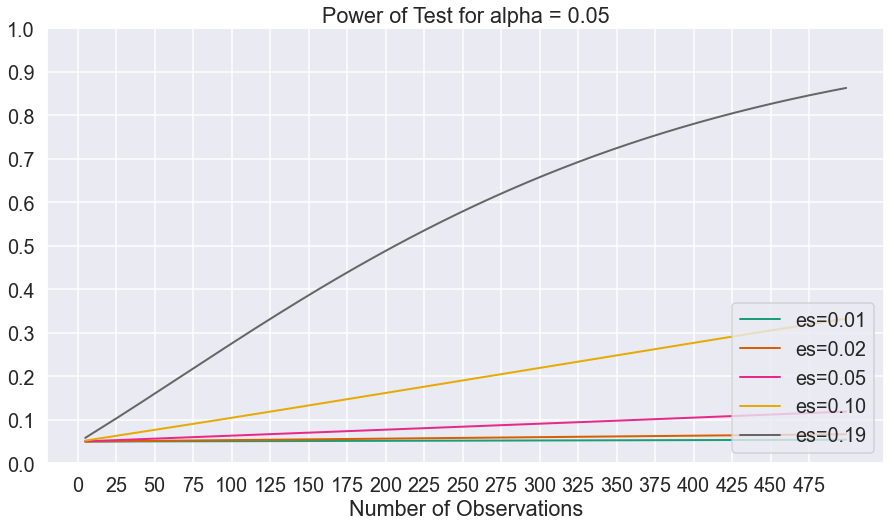

In [8]:
sns.set_theme(context='talk',
             style='darkgrid',
             font_scale=1.2)
%matplotlib inline

sd = pooled_sd

e_sizes = [mean_diff/sd for mean_diff in [1,2,4,8,16]]
fig, axes = plt.subplots(figsize=(15,8))
for n,alpha in enumerate([0.05]):
    print(type(n), alpha)
    ax = axes
    power_analysis.plot_power(dep_var="nobs",
                              nobs = np.array(range(5,500)),
                              effect_size=e_sizes,
                              alpha=alpha,
                              ax=ax)
    ax.set_title('Power of Test for alpha = {}'.format(alpha))
    ax.set_xticks(list(range(0,500,25)))
    ax.set_yticks(np.linspace(0,1,11))


# e_sizes = [mu_delta/sd for mu_delta in [.005,.01,.02,.03]]
# fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(8,15))
# for n, alpha in enumerate([.01, .05, .1]):
#     print(type(n), alpha)
#     ax = axes[n]
#     power_analysis.plot_power(dep_var="nobs",
#                               nobs = np.array(range(5,500)),
#                               effect_size=e_sizes,
#                               alpha=alpha,
#                               ax=ax)
#     ax.set_title('Power of Test for alpha = {}'.format(alpha))
#     ax.set_xticks(list(range(0,500,25)))
#     ax.set_yticks(np.linspace(0,1,11))

In [14]:
#It looks like we would need around 400 observations to be 90% confident with an effect size of 0.19.
#but the effect size of the data is closer to 0.10 and that shows that at 400 samples, we can be about 30% confident 
#would need about 2000 samples for 90% confidence with our effect size of 0.089